In [67]:
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 1000)


In [68]:

# Read the data from file using pandas
df = pd.read_csv("student_data.csv")

# variable k: A, B, C, D
# -> four variables A, B, C, D
# 1 0 0 0
# 0 1 0 0

#cat_column = [
#    'school',
#    'sex',
#    sex	age	address	famsize	Pstatus	Medu	Fedu	Mjob	Fjob	...	famrel	freetime	goout	Dalc	Walc	health	absences	G1	G2	G3
#]

cat_columns = [
    'school', 
    'sex', 
    'address', 
    'famsize', 
    'Pstatus', 
    'Mjob', 
    'Fjob', 
    'reason', 
    'guardian', 
    'schoolsup', 
    'famsup', 
    'paid', 
    'activities', 
    'nursery',
    'higher', 
    'internet',
    'romantic',
]

numeric_column = [
    'age', 
    'Medu', 
    'Fedu', 
    'traveltime', 
    'studytime', 
    'failures', 
    'famrel', 
    'freetime', 
    'goout', 
    'Dalc', 
    'Walc', 
    'health', 
    'absences', 
    # 'G1', 
    # 'G2', 
    # 'G3'
]

df

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,course,mother,2,2,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,course,father,1,2,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,other,mother,1,2,3,yes,no,yes,no,yes,yes,yes,no,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,home,mother,1,3,0,no,yes,yes,yes,yes,yes,yes,yes,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,home,father,1,2,0,no,yes,yes,no,yes,yes,no,no,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,course,other,1,2,2,no,yes,yes,no,yes,yes,no,no,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,course,mother,2,1,0,no,no,no,no,no,yes,yes,no,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,course,other,1,1,3,no,no,no,no,no,yes,no,no,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,course,mother,3,1,0,no,no,no,no,no,yes,yes,no,4,4,1,3,4,5,0,11,12,10


In [69]:
def one_hot_encode(df, columns):
    """
    One-hot encodes specified columns in a pandas DataFrame.
    """
    for column in columns:
        dummies = pd.get_dummies(df[column], prefix=column)
        df = pd.concat([df, dummies], axis=1)
        df.drop(column, axis=1, inplace=True)
    return df

def normalize(df, columns):
    """
    Normalizes specified columns in a pandas DataFrame between 0 and 1.
    """
    for column in columns:
        df[column] = (df[column] - df[column].min()) / (df[column].max() - df[column].min())
    return df

In [70]:
df = one_hot_encode(df, cat_columns)
df = normalize(df, numeric_column)

df['final_grade'] = ((df['G1'] + df['G2'] + df['G3'])/ 3)

# drop G1, G2, G3
df = df.drop(columns=['G1', 'G2', 'G3'], axis=1)

display(df)

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,Walc,health,absences,school_GP,school_MS,sex_F,sex_M,address_R,address_U,famsize_GT3,famsize_LE3,Pstatus_A,Pstatus_T,Mjob_at_home,Mjob_health,Mjob_other,Mjob_services,Mjob_teacher,Fjob_at_home,Fjob_health,Fjob_other,Fjob_services,Fjob_teacher,reason_course,reason_home,reason_other,reason_reputation,guardian_father,guardian_mother,guardian_other,schoolsup_no,schoolsup_yes,famsup_no,famsup_yes,paid_no,paid_yes,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes,final_grade
0,0.428571,1.00,1.00,0.333333,0.333333,0.000000,0.75,0.50,0.75,0.00,0.00,0.50,0.080000,1,0,1,0,0,1,1,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,1,0,5.666667
1,0.285714,0.25,0.25,0.000000,0.333333,0.000000,1.00,0.50,0.50,0.00,0.00,0.50,0.053333,1,0,1,0,0,1,1,0,0,1,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,1,0,1,0,1,0,0,1,0,1,1,0,5.333333
2,0.000000,0.25,0.25,0.000000,0.333333,1.000000,0.75,0.50,0.25,0.25,0.50,0.50,0.133333,1,0,1,0,0,1,0,1,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,1,1,0,0,1,0,1,0,1,1,0,8.333333
3,0.000000,1.00,0.50,0.000000,0.666667,0.000000,0.50,0.25,0.25,0.00,0.00,1.00,0.026667,1,0,1,0,0,1,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,1,14.666667
4,0.142857,0.75,0.75,0.000000,0.333333,0.000000,0.75,0.50,0.25,0.00,0.25,1.00,0.053333,1,0,1,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,8.666667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,0.714286,0.50,0.50,0.000000,0.333333,0.666667,1.00,1.00,0.75,0.75,1.00,0.75,0.146667,0,1,0,1,0,1,0,1,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,1,1,0,0,1,0,1,1,0,0,1,0,1,1,0,1,0,9.000000
391,0.285714,0.75,0.25,0.333333,0.000000,0.000000,0.25,0.75,1.00,0.50,0.75,0.25,0.040000,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,15.333333
392,0.857143,0.25,0.25,0.000000,0.000000,1.000000,1.00,1.00,0.50,0.50,0.50,0.50,0.040000,0,1,0,1,1,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,8.333333
393,0.428571,0.75,0.50,0.666667,0.000000,0.000000,0.75,0.75,0.00,0.50,0.75,1.00,0.000000,0,1,0,1,1,0,0,1,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,1,1,0,11.000000


In [71]:
import torch

# tensor x is all the columns except the final_grade
tensor_x = torch.tensor(df.drop(columns=['final_grade'], axis=1).values, dtype=torch.float32)

tensor_y = torch.tensor(df['final_grade'].values, dtype=torch.float32)



tensor_x.shape

torch.Size([395, 56])

In [72]:
from torch import nn
from torchsummary import summary
from tqdm import tqdm
import matplotlib.pyplot as plt

# sequential layer
model = nn.Sequential(
    
    nn.Linear(56, 128),
   
    nn.ReLU(),
    nn.Linear(128, 128),
   
    nn.ReLU(),
    nn.Linear(128, 128),
   
    nn.ReLU(),
    nn.Linear(128, 128),
   
    nn.ReLU(),
    nn.Linear(128, 1),
    
)

display(model)

# take

# mystery step???
summary(model, (56,), device='cpu')

Sequential(
  (0): Linear(in_features=56, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=128, bias=True)
  (3): ReLU()
  (4): Linear(in_features=128, out_features=128, bias=True)
  (5): ReLU()
  (6): Linear(in_features=128, out_features=128, bias=True)
  (7): ReLU()
  (8): Linear(in_features=128, out_features=1, bias=True)
)

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]           7,296
              ReLU-2                  [-1, 128]               0
            Linear-3                  [-1, 128]          16,512
              ReLU-4                  [-1, 128]               0
            Linear-5                  [-1, 128]          16,512
              ReLU-6                  [-1, 128]               0
            Linear-7                  [-1, 128]          16,512
              ReLU-8                  [-1, 128]               0
            Linear-9                    [-1, 1]             129
Total params: 56,961
Trainable params: 56,961
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.01
Params size (MB): 0.22
Estimated Total Size (MB): 0.23
---------------------------------------------

  0%|          | 0/3000 [00:00<?, ?it/s]/home/magni/Documents/artificial-intelligence/env/lib/python3.10/site-packages/torch/nn/modules/loss.py:536: UserWarning: Using a target size (torch.Size([395])) that is different to the input size (torch.Size([395, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)
100%|██████████| 3000/3000 [00:12<00:00, 247.58it/s]


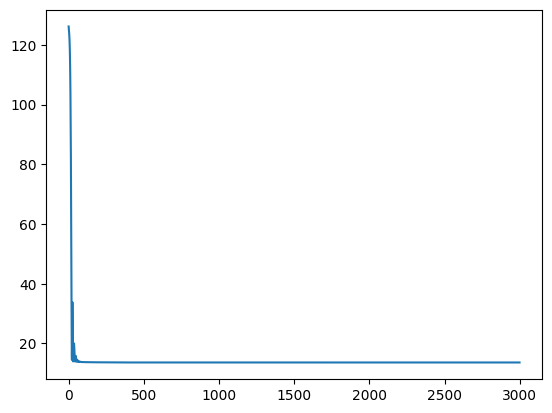

In [73]:
import torch.optim as optim

# mean squared error loss
loss_fn = nn.MSELoss()

# the higher the parameters, the faster the change
# SGD ADAM

optimizer = optim.Adam(model.parameters(), lr=1e-3) # 0.001

epochs = 3000

losses = []

for i in tqdm(range(epochs)):
    optimizer.zero_grad()
    
    # data loader, batch data together

    # y_hat = model(x.unsqueeze(1))
    y_hat = model(tensor_x)
    # 56 variables
    
    # difference between y hat and y
    # 1 variable
    loss = loss_fn(y_hat, tensor_y)

    losses.append(loss.item())
    
    # parameters -> loss
    # loss.backward() -> parameters.gradients
    # optimizer.step() -> uses optimiers.parameters.gradients to update parameters

    loss.backward()

    optimizer.step()

plt.plot(losses)